In [170]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

## **Loading data**

In [172]:
uploaded_file = files.upload()
filename = next(iter(uploaded_file))

Saving exam_scores (2).csv to exam_scores (2) (2).csv


In [173]:
df = pd.read_csv(filename)
df.head()

,SOBAODANH,id,TOAN,LY,HOA,NGOAI_NGU,TEN_MON_NGOAI_NGU,MA_MON_NGOAI_NGU,SINH,VAN,SU,DIA,GIAO_DUC_CONG_DAN
0,40000011,1026070,4.2,NaN,NaN,5.0,Tieng Anh,N1,NaN,7.50,6.25,6.00,7.75
1,40000022,895794,6.0,6.75,6.5,4.6,Tieng Anh,N1,5.0,8.00,NaN,NaN,NaN
2,40000031,900938,5.8,NaN,NaN,4.8,Tieng Anh,N1,NaN,7.00,7.50,7.00,8.75
3,40000028,895805,7.6,8.00,7.0,3.8,Tieng Anh,N1,6.0,6.75,NaN,NaN,NaN
4,40000004,899187,7.0,NaN,NaN,4.4,Tieng Anh,N1,NaN,6.00,5.75,6.75,8.75


# **Cleaning Data**

In [174]:
# Rename columns in df to have Vietnamese diacritics
df = df.rename(columns={
    'SOBAODANH': 'Số báo danh',
    'id': 'ID',
    'TOAN': 'Toán',
    'LY': 'Vật Lý',
    'HOA': 'Hóa học',
    'NGOAI_NGU': 'Ngoại ngữ',
    'TEN_MON_NGOAI_NGU': 'Tên môn ngoại ngữ',
    'MA_MON_NGOAI_NGU': 'Mã môn ngoại ngữ',
    'SINH': 'Sinh học',
    'VAN': 'Ngữ Văn',
    'SU': 'Lịch Sử',
    'DIA': 'Địa Lí',
    'GIAO_DUC_CONG_DAN': 'GDCD'
})

print("\nDataFrame 2 with Vietnamese diacritics:")



DataFrame 2 with Vietnamese diacritics:


In [175]:
df.head()

,Số báo danh,ID,Toán,Vật Lý,Hóa học,Ngoại ngữ,Tên môn ngoại ngữ,Mã môn ngoại ngữ,Sinh học,Ngữ Văn,Lịch Sử,Địa Lí,GDCD
0,40000011,1026070,4.2,NaN,NaN,5.0,Tieng Anh,N1,NaN,7.50,6.25,6.00,7.75
1,40000022,895794,6.0,6.75,6.5,4.6,Tieng Anh,N1,5.0,8.00,NaN,NaN,NaN
2,40000031,900938,5.8,NaN,NaN,4.8,Tieng Anh,N1,NaN,7.00,7.50,7.00,8.75
3,40000028,895805,7.6,8.00,7.0,3.8,Tieng Anh,N1,6.0,6.75,NaN,NaN,NaN
4,40000004,899187,7.0,NaN,NaN,4.4,Tieng Anh,N1,NaN,6.00,5.75,6.75,8.75


In [199]:
foreign_language_code = {
    'N1': 'Tiếng Anh',
    'N2': 'Tiếng Nga',
    'N3': 'Tiếng Pháp',
    'N4': 'Tiếng Trung Quốc',
    'N5': 'Tiếng Đức',
    'N6': 'Tiếng Nhật',
    'N7': 'Tiếng Hàn'
}

In [178]:
# Apply the mapping to the 'TEN_MON_NGOAI_NGU' column
df['Tên môn ngoại ngữ'] = df['Mã môn ngoại ngữ'].map(foreign_language_code)

# Display the updated DataFrame
df.head()


,Số báo danh,ID,Toán,Vật Lý,Hóa học,Ngoại ngữ,Tên môn ngoại ngữ,Mã môn ngoại ngữ,Sinh học,Ngữ Văn,Lịch Sử,Địa Lí,GDCD
0,40000011,1026070,4.2,NaN,NaN,5.0,Tiếng Anh,N1,NaN,7.50,6.25,6.00,7.75
1,40000022,895794,6.0,6.75,6.5,4.6,Tiếng Anh,N1,5.0,8.00,NaN,NaN,NaN
2,40000031,900938,5.8,NaN,NaN,4.8,Tiếng Anh,N1,NaN,7.00,7.50,7.00,8.75
3,40000028,895805,7.6,8.00,7.0,3.8,Tiếng Anh,N1,6.0,6.75,NaN,NaN,NaN
4,40000004,899187,7.0,NaN,NaN,4.4,Tiếng Anh,N1,NaN,6.00,5.75,6.75,8.75


# **EDA**

In [180]:
df2 = df.copy()
df2.head()

,Số báo danh,ID,Toán,Vật Lý,Hóa học,Ngoại ngữ,Tên môn ngoại ngữ,Mã môn ngoại ngữ,Sinh học,Ngữ Văn,Lịch Sử,Địa Lí,GDCD
0,40000011,1026070,4.2,NaN,NaN,5.0,Tiếng Anh,N1,NaN,7.50,6.25,6.00,7.75
1,40000022,895794,6.0,6.75,6.5,4.6,Tiếng Anh,N1,5.0,8.00,NaN,NaN,NaN
2,40000031,900938,5.8,NaN,NaN,4.8,Tiếng Anh,N1,NaN,7.00,7.50,7.00,8.75
3,40000028,895805,7.6,8.00,7.0,3.8,Tiếng Anh,N1,6.0,6.75,NaN,NaN,NaN
4,40000004,899187,7.0,NaN,NaN,4.4,Tiếng Anh,N1,NaN,6.00,5.75,6.75,8.75



Thống kê điểm cho môn Toán:


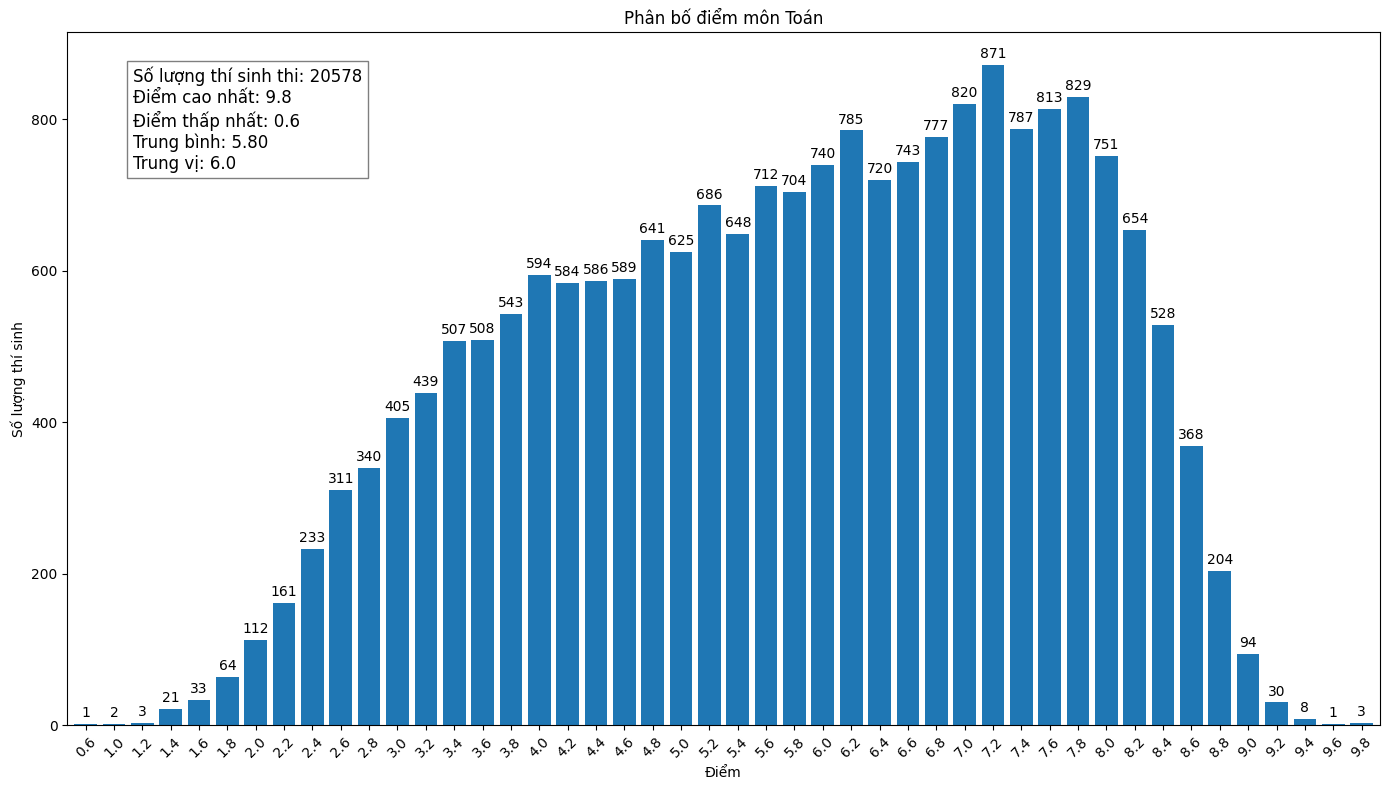


Thống kê điểm cho môn Ngữ Văn:


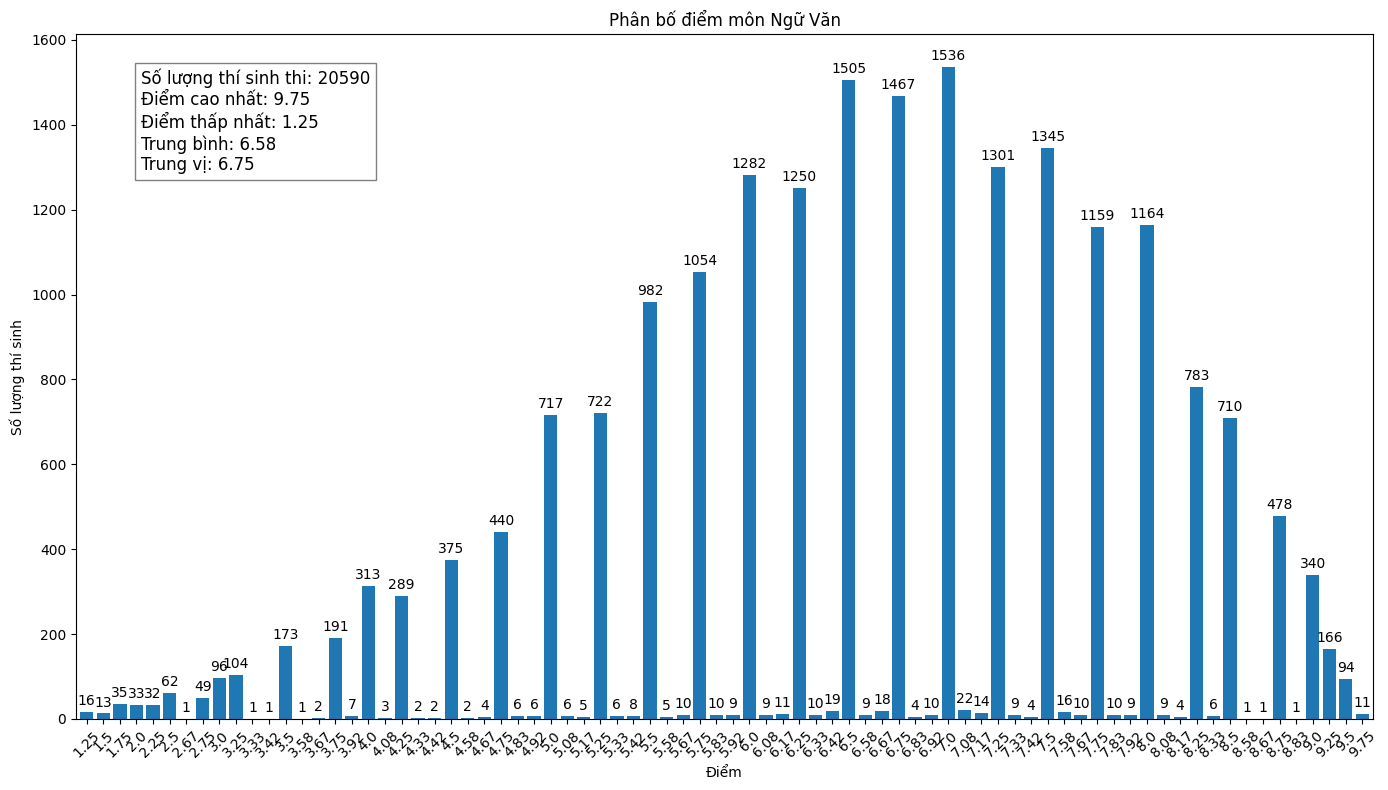


Thống kê điểm cho môn Sinh học:


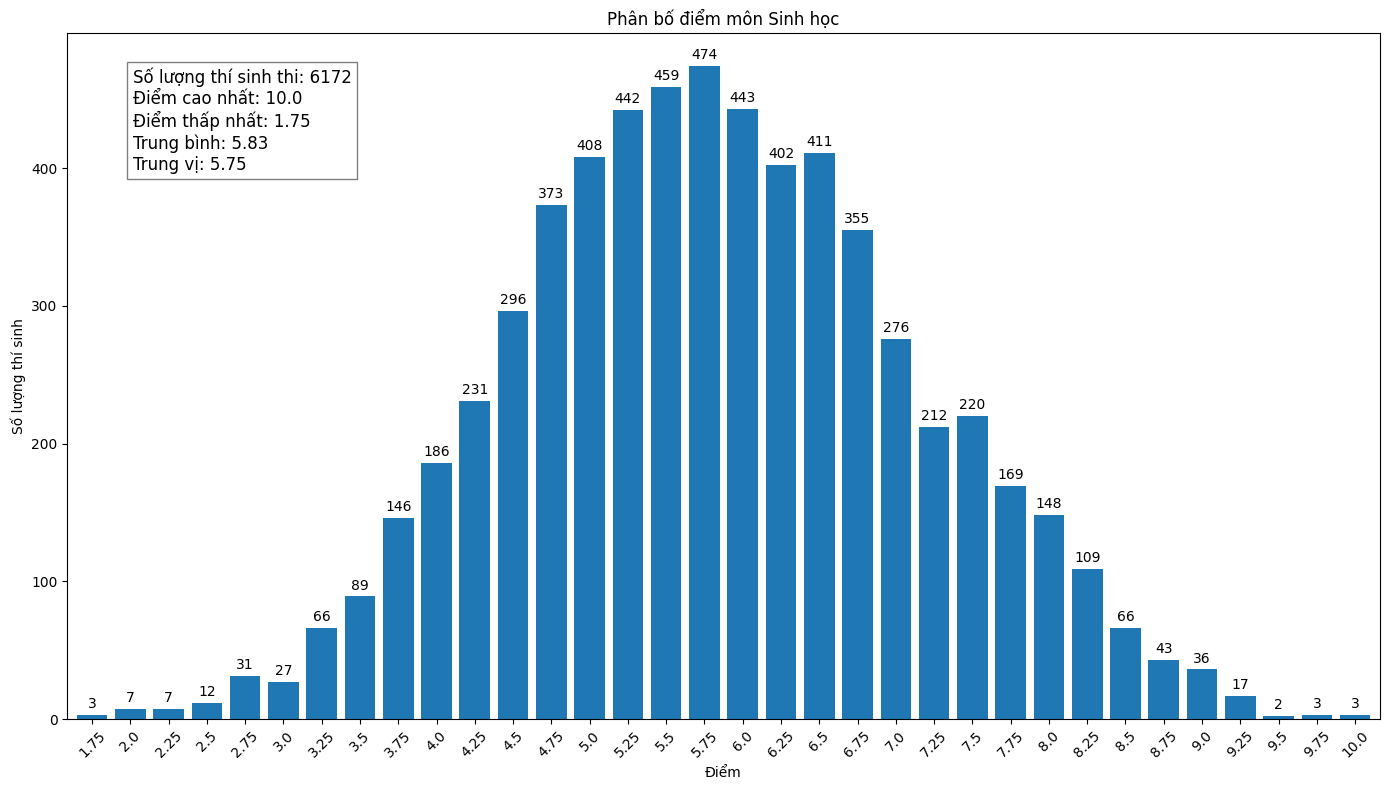


Thống kê điểm cho môn Hóa học:


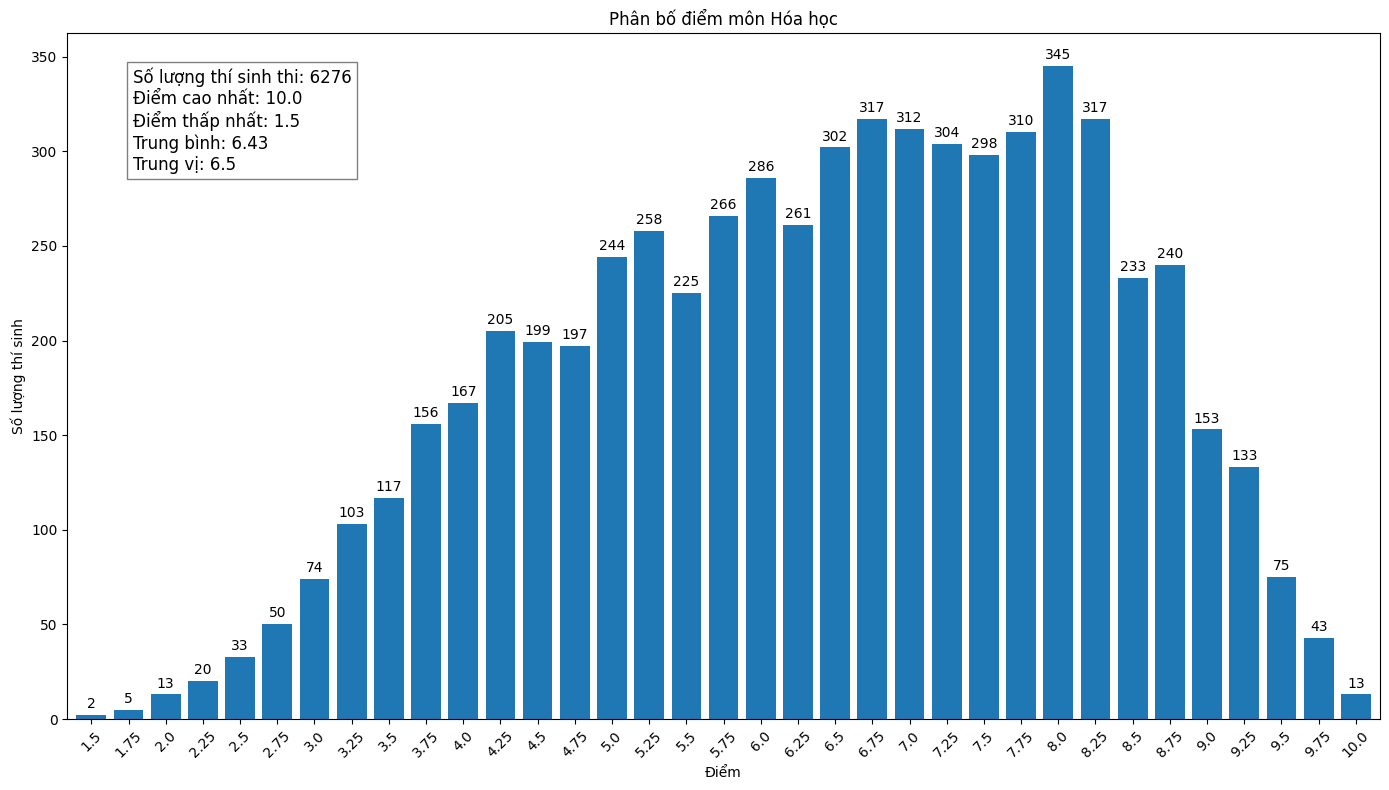


Thống kê điểm cho môn Vật Lý:


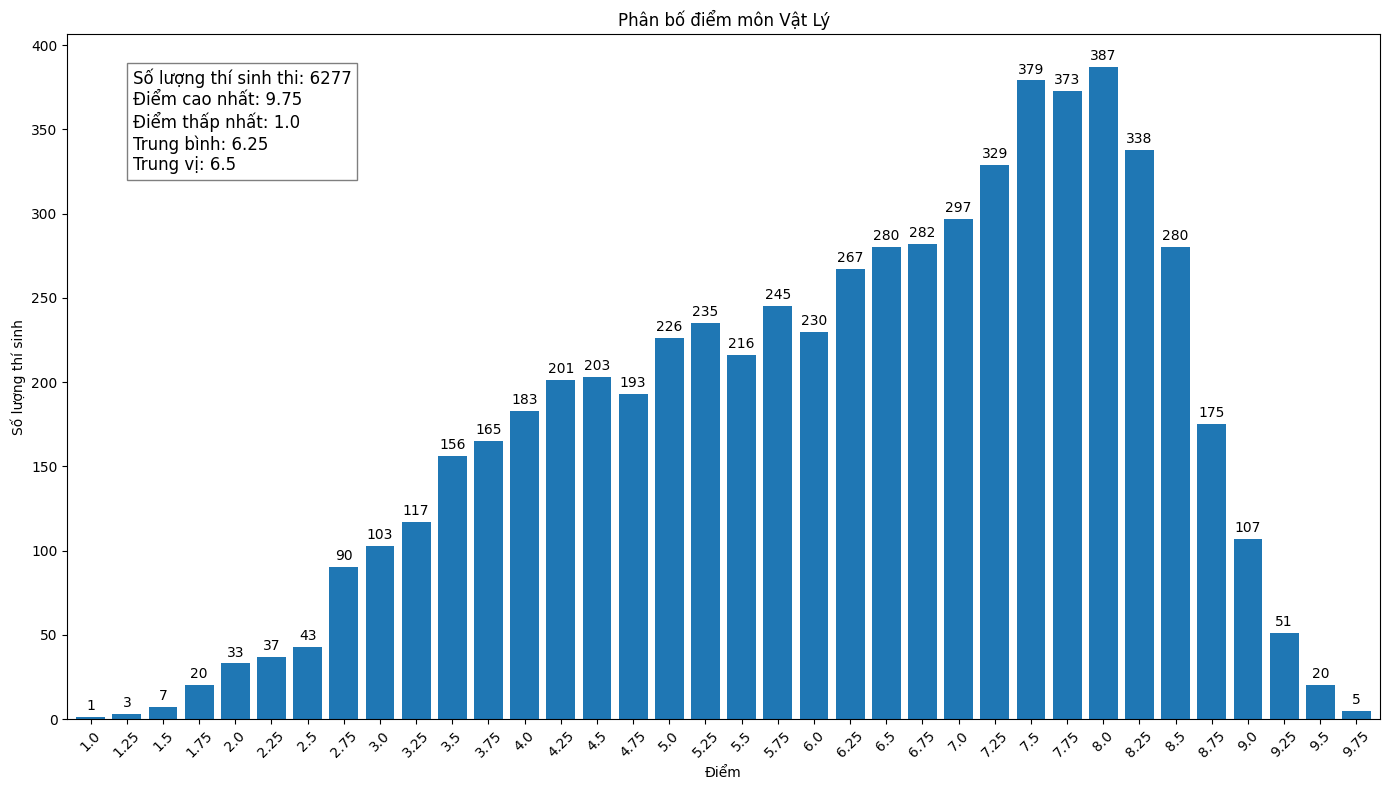


Thống kê điểm cho môn Lịch Sử:


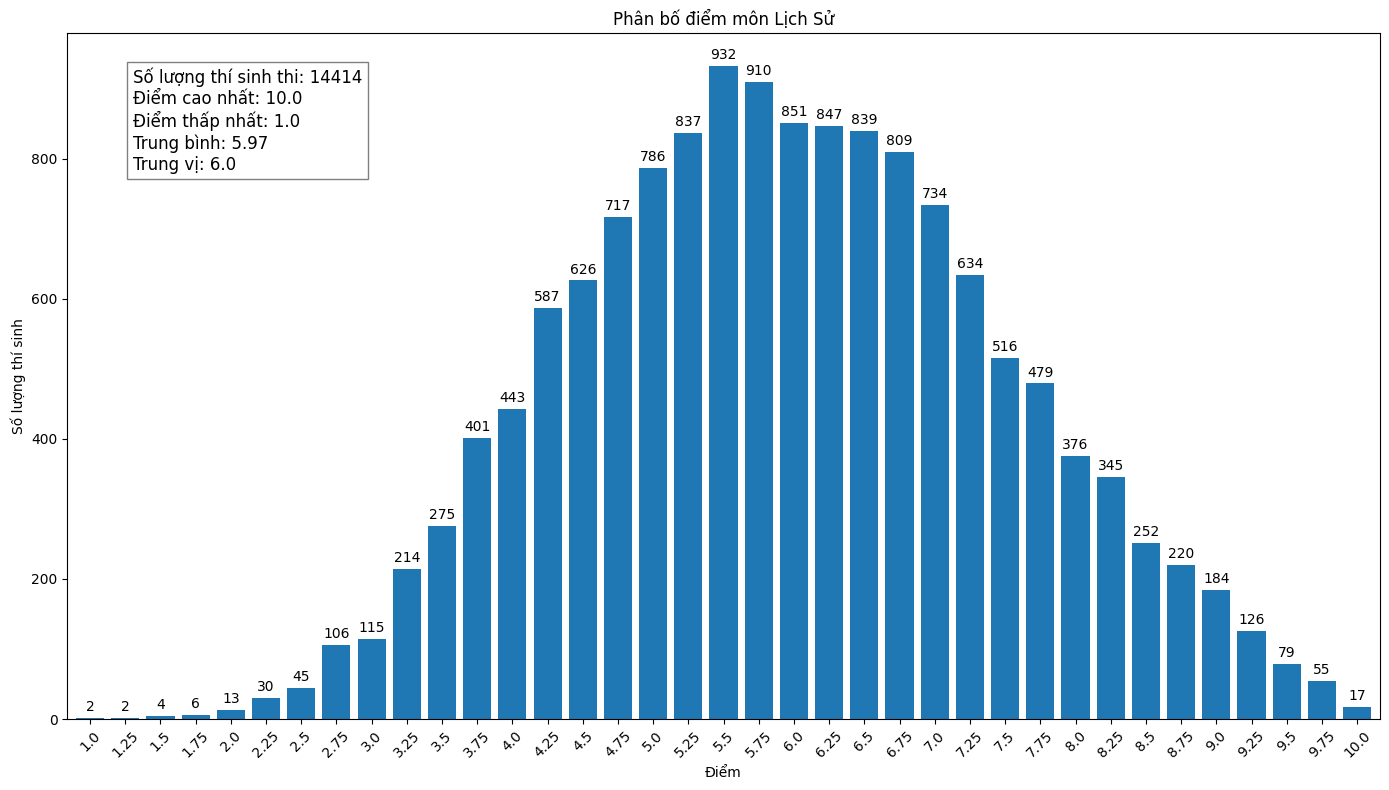


Thống kê điểm cho môn Địa Lí:


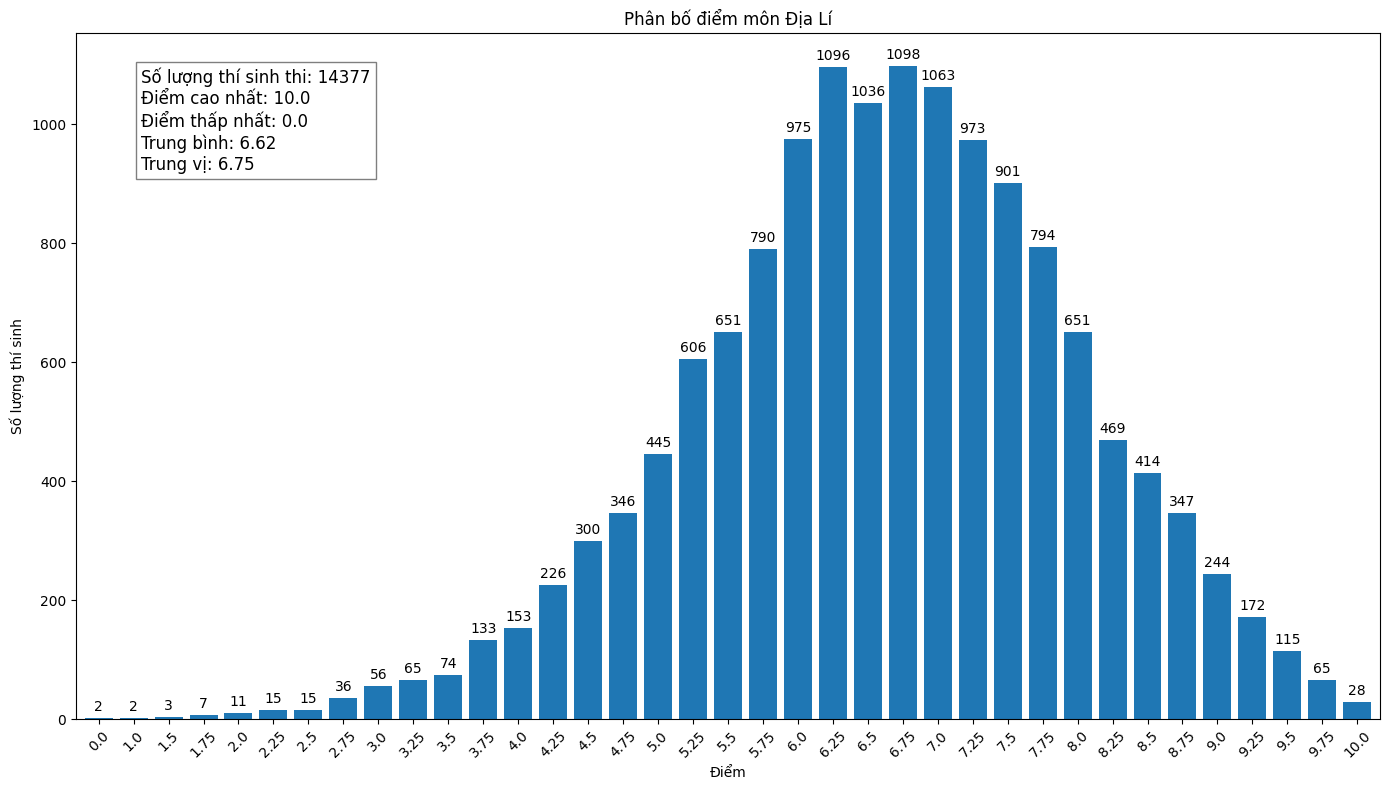


Thống kê điểm cho môn GDCD:


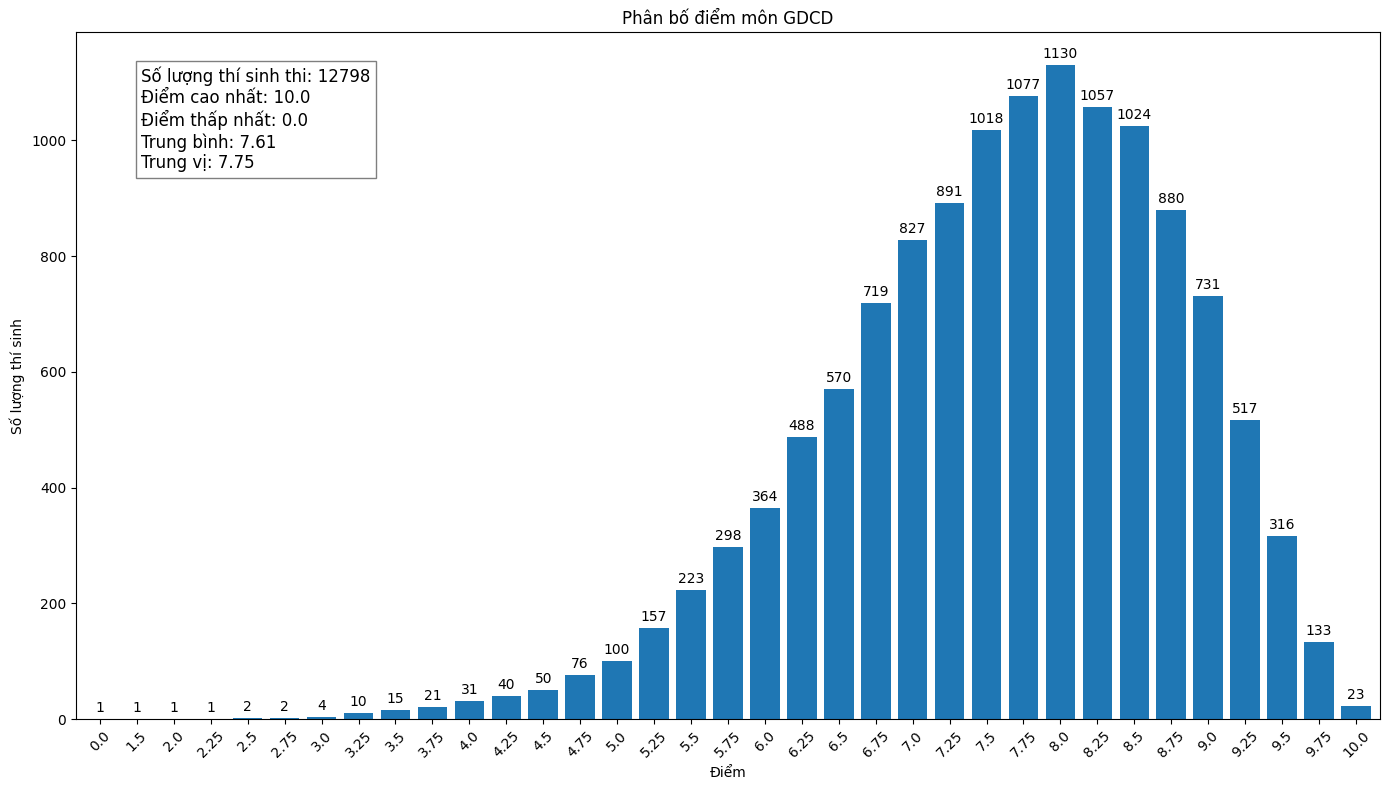

In [181]:
subjects = ['Toán', 'Ngữ Văn', 'Sinh học', 'Hóa học', 'Vật Lý', 'Lịch Sử', 'Địa Lí', 'GDCD']

# Thực hiện thống kê cho từng môn học
for subject in subjects:
    print(f"\nThống kê điểm cho môn {subject}:")
    subject_data = df2[subject].dropna().astype(float)
    subject_counts = subject_data.value_counts().sort_index()

    # Vẽ biểu đồ cột
    plt.figure(figsize=(14, 8))  # Làm biểu đồ to hơn
    if subject == 'Văn':
        bins = int((subject_data.max() - subject_data.min()) / 1.5)
        ax = subject_data.plot(kind='hist', bins=bins, width=1.5, edgecolor='black')
    else:
        ax = subject_counts.plot(kind='bar', width=0.8)  # Giãn khoảng cách giữa các cột

    # In số lượng lên cột hoặc cột tròn
    if subject != 'Văn':
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')  # Làm số nhỏ lại
    else:
        for rect in ax.patches:
            height = rect.get_height()
            ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points',
                        ha='center', va='bottom', fontsize=10, color='black')

    # Thống kê các giá trị
    num_students = subject_data.count()
    max_score = subject_data.max()
    min_score = subject_data.min()
    mean_score = subject_data.mean()
    median_score = subject_data.median()

    # In các giá trị thống kê lên biểu đồ
    stats_text = (f"Số lượng thí sinh thi: {num_students}\n"
                  f"Điểm cao nhất: {max_score}\n"
                  f"Điểm thấp nhất: {min_score}\n"
                  f"Trung bình: {mean_score:.2f}\n"
                  f"Trung vị: {median_score}")

    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))

    plt.title(f"Phân bố điểm môn {subject}")
    plt.xlabel("Điểm")
    plt.ylabel("Số lượng thí sinh")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Tên môn ngoại ngữ
Tiếng Anh           18867
Tiếng Pháp             28
Tiếng Trung Quốc       21
Tiếng Hàn               7
Tiếng Nhật              3
Name: count, dtype: int64


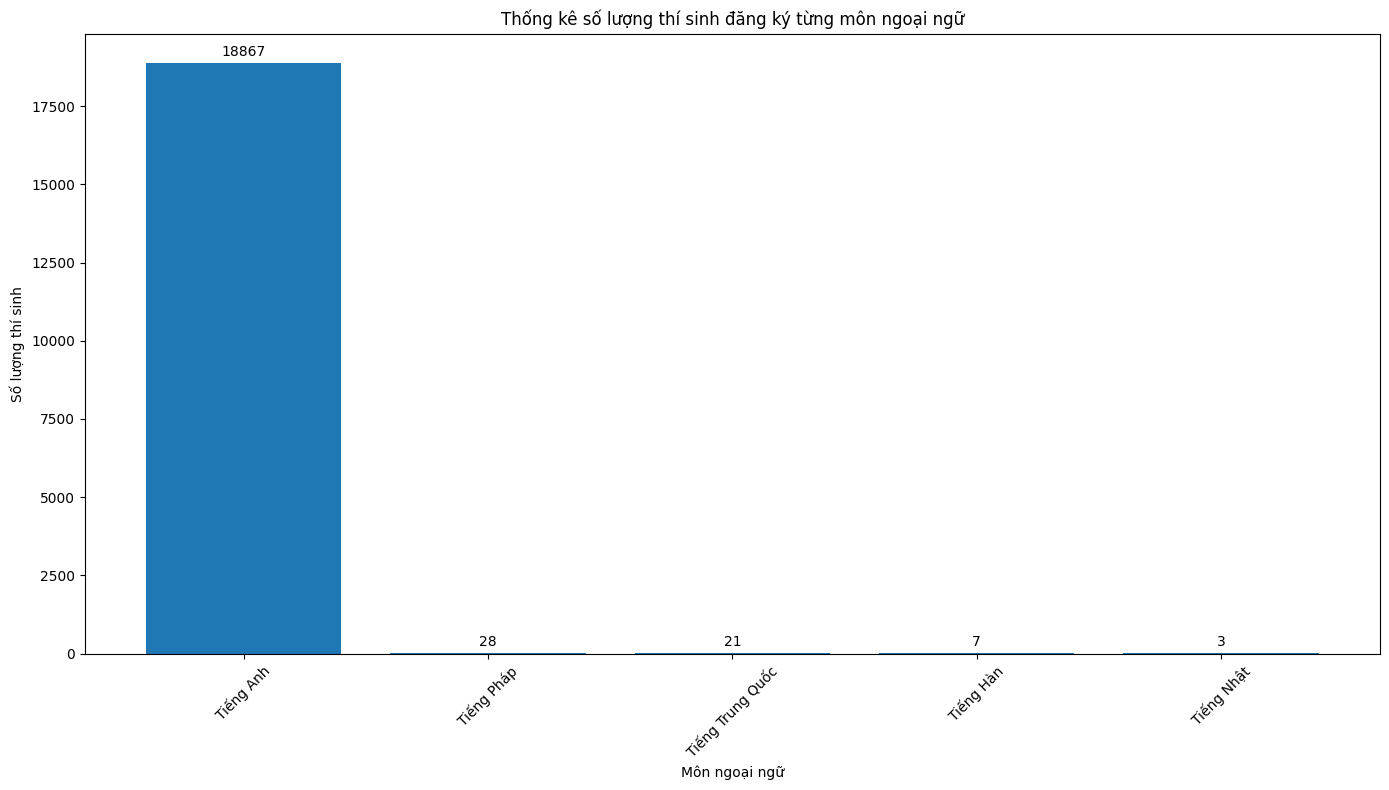

In [182]:
# prompt: dựa vào mã môn ngoại ngữ ở df2 và foreign_language_code, thực hiện thống kê các môn ngoại ngữ tương ứng với mã

# Thống kê số lượng thí sinh đăng ký từng môn ngoại ngữ
foreign_language_counts = df2['Tên môn ngoại ngữ'].value_counts()

# Hiển thị kết quả thống kê
print(foreign_language_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
ax = foreign_language_counts.plot(kind='bar', width=0.8)

# Hiển thị số lượng trên mỗi cột
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Thống kê số lượng thí sinh đăng ký từng môn ngoại ngữ")
plt.xlabel("Môn ngoại ngữ")
plt.ylabel("Số lượng thí sinh")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


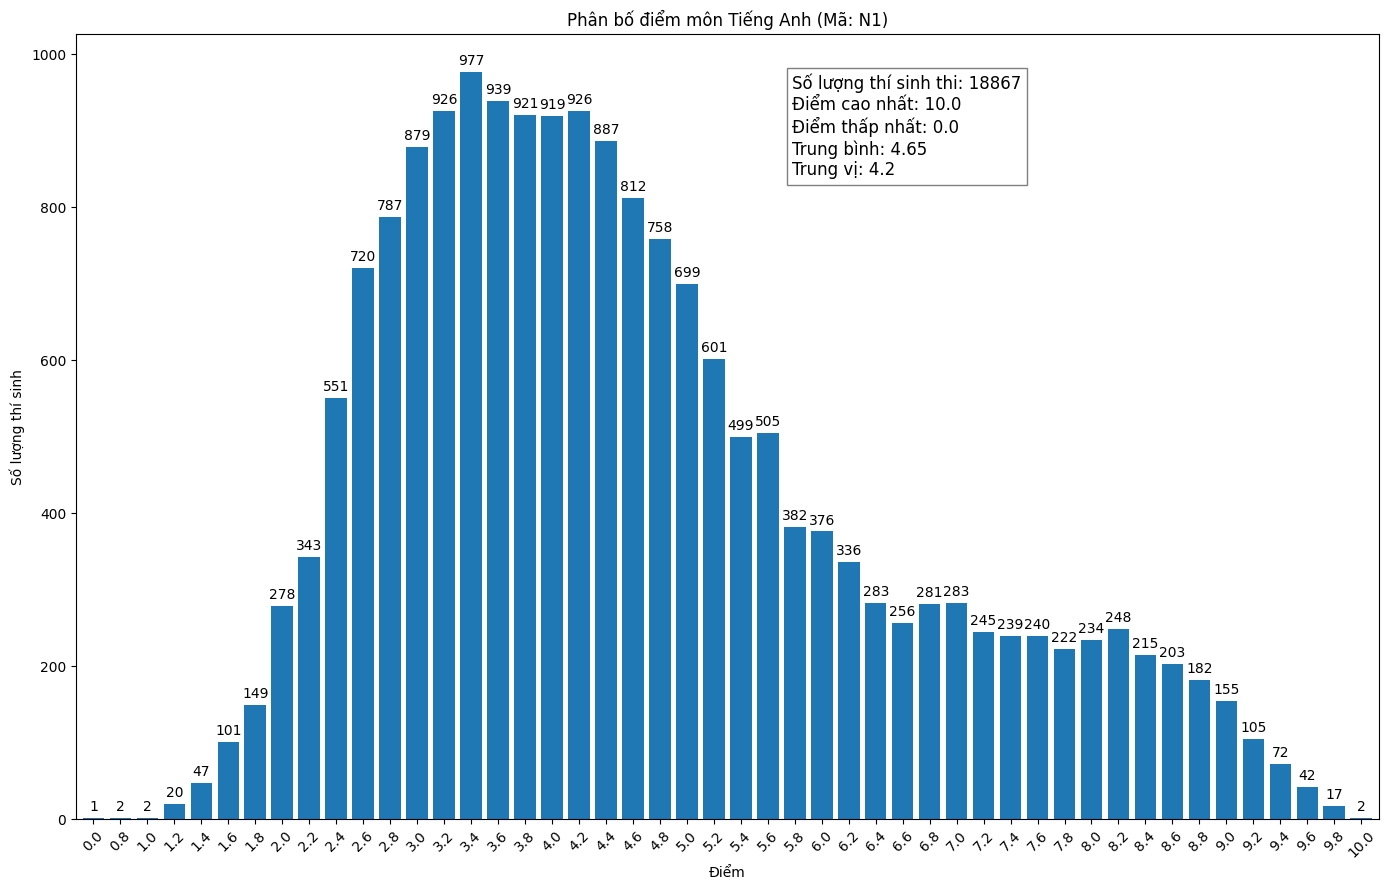

Không có dữ liệu cho môn Tiếng Nga (Mã: N2)


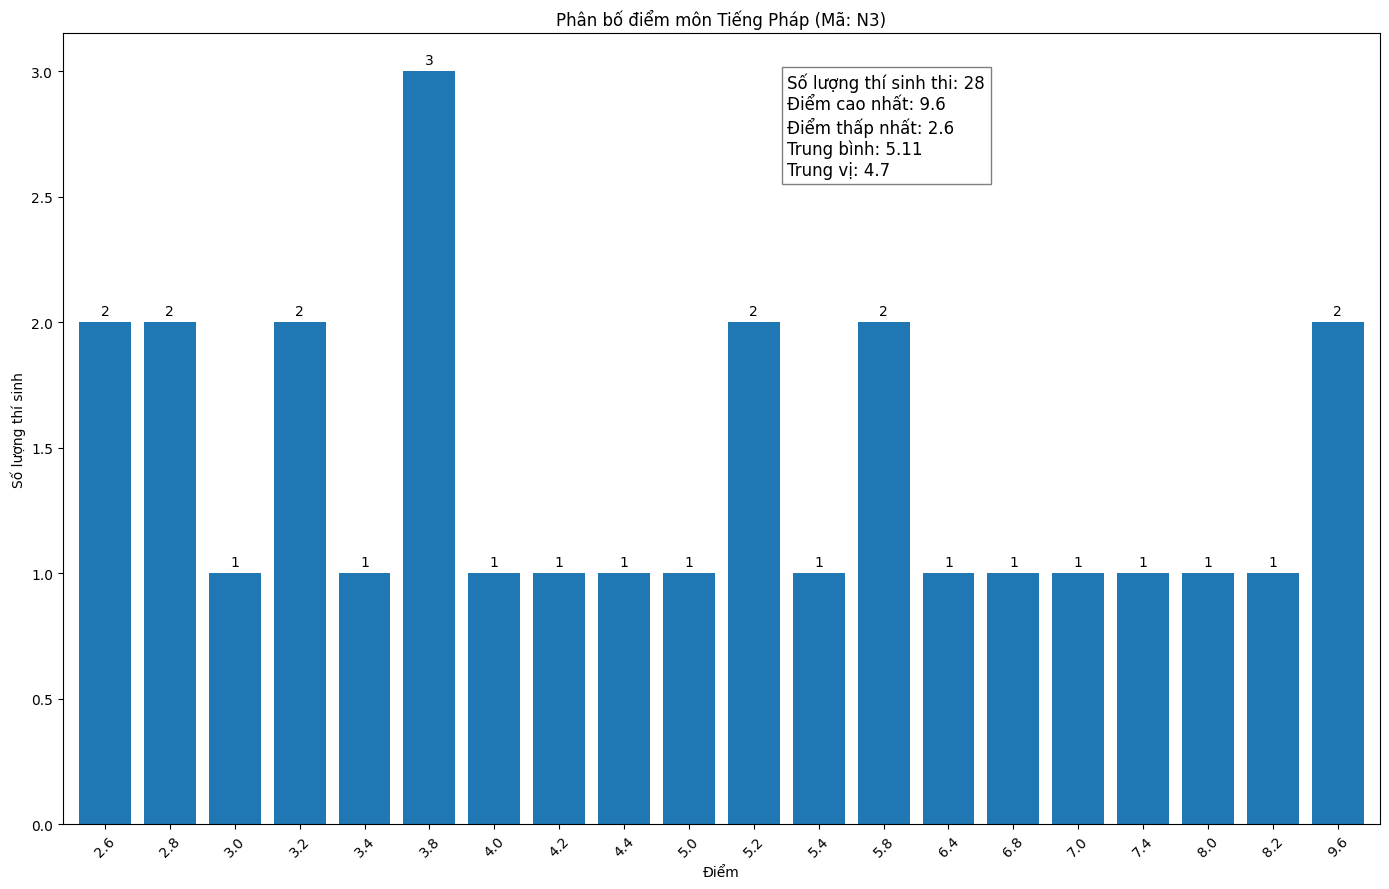

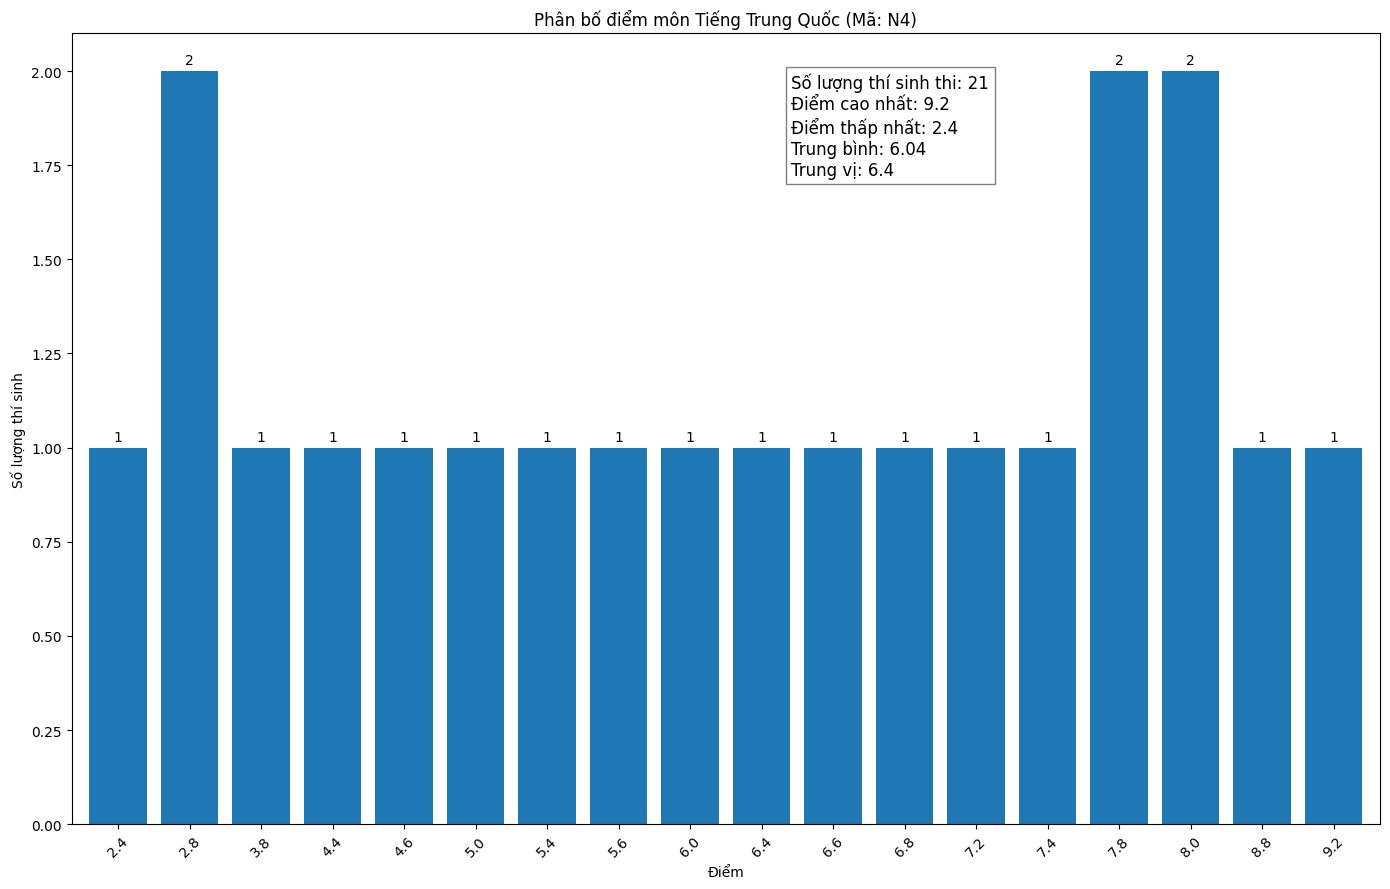

Không có dữ liệu cho môn Tiếng Đức (Mã: N5)


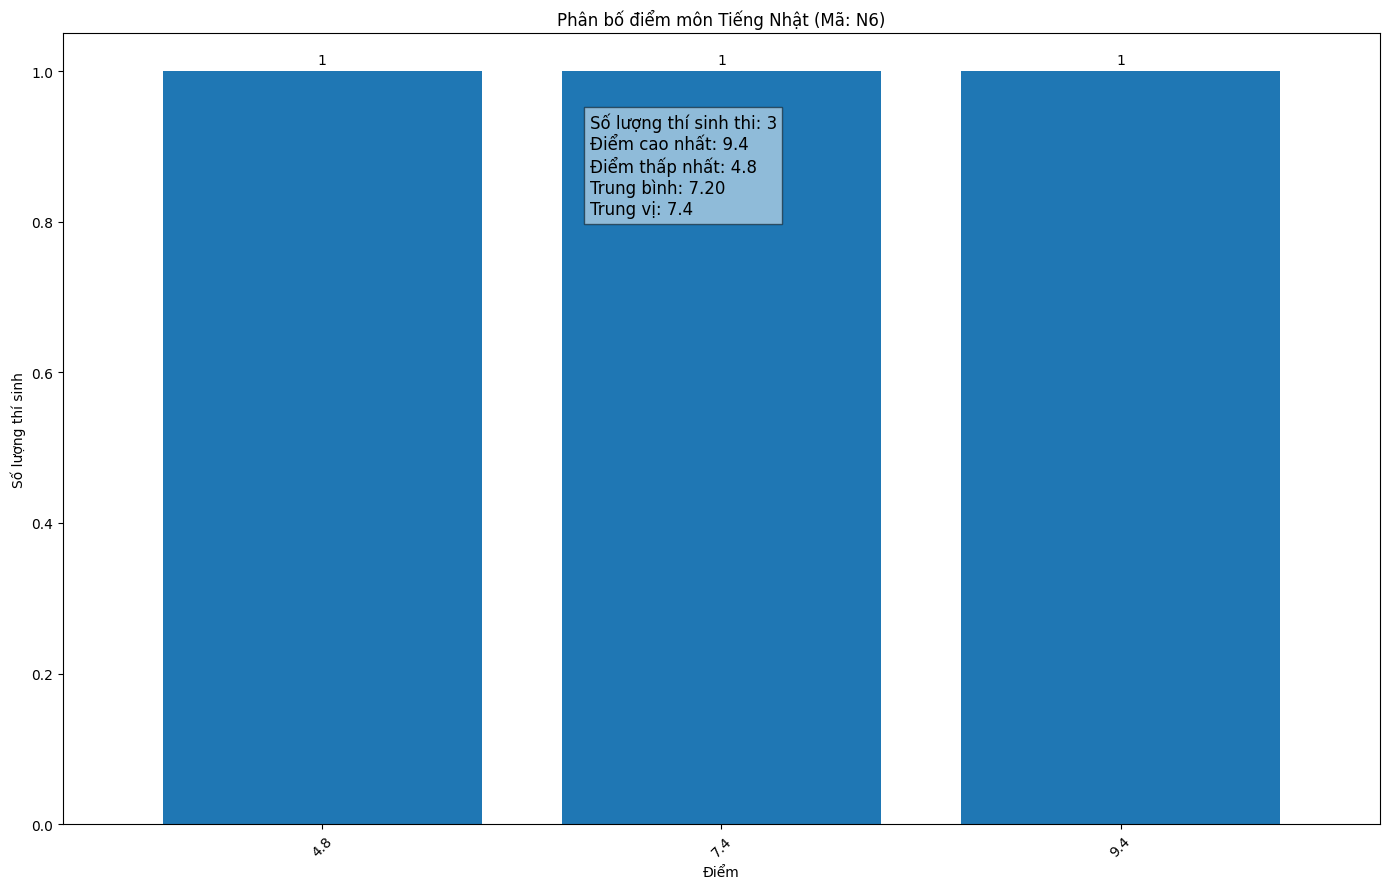

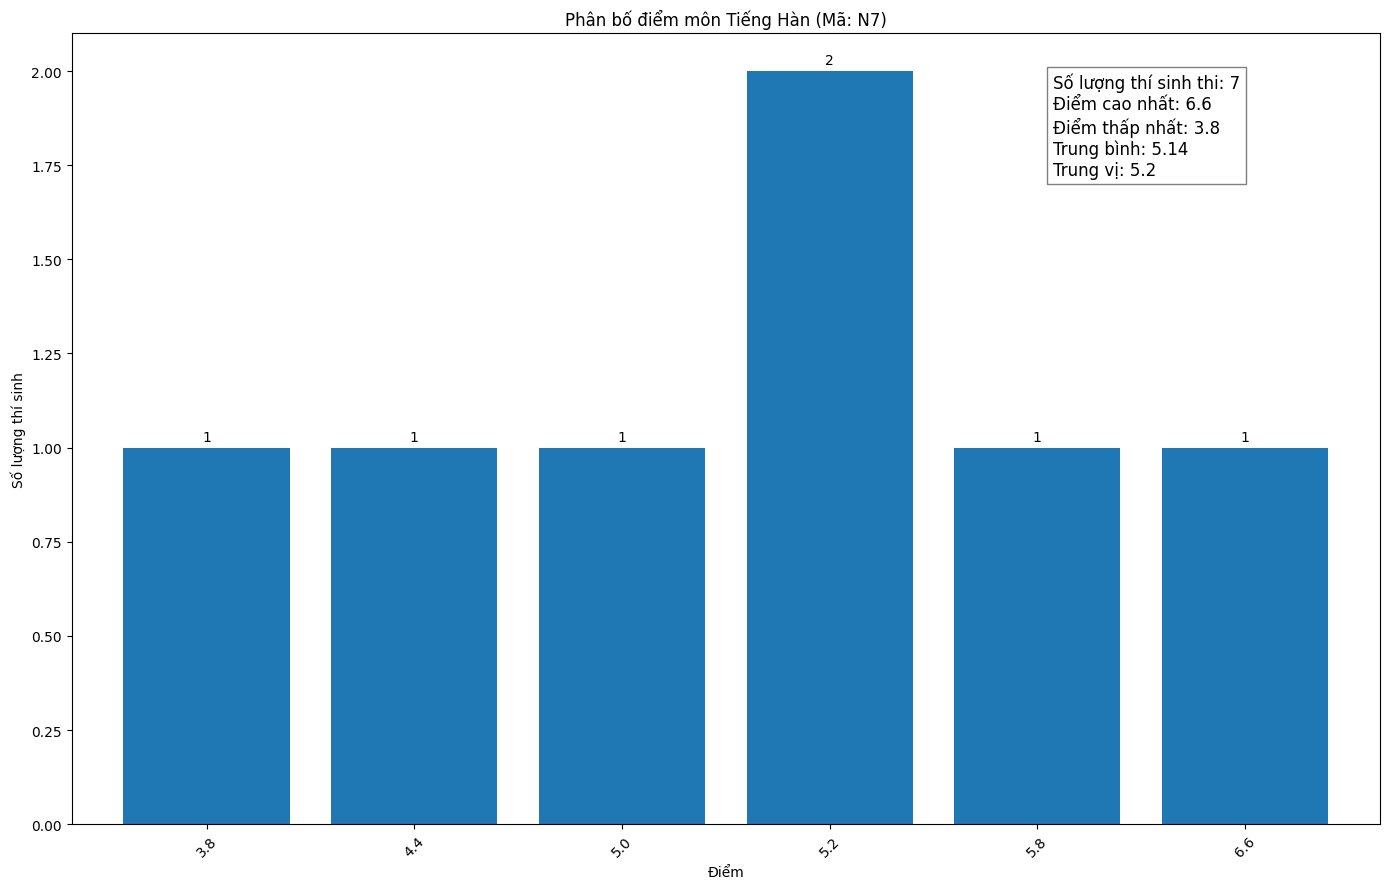

In [183]:
for language_code, language_name in foreign_language_code.items():
    # Lọc dữ liệu theo mã môn ngoại ngữ và lấy cột Điểm
    language_data = df2[df2['Mã môn ngoại ngữ'] == language_code]['Ngoại ngữ'].dropna().astype(float)

    if not language_data.empty:  # Kiểm tra xem có dữ liệu cho môn ngoại ngữ này không
        language_counts = language_data.value_counts().sort_index()

        # Vẽ biểu đồ cột
        plt.figure(figsize=(14, 9))
        ax = language_counts.plot(kind='bar', width=0.8)

        # In số lượng lên cột
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

        # Thống kê các giá trị
        num_students = language_data.count()
        max_score = language_data.max()
        min_score = language_data.min()
        mean_score = language_data.mean()
        median_score = language_data.median()

        # In các giá trị thống kê lên biểu đồ
        stats_text = (f"Số lượng thí sinh thi: {num_students}\n"
                      f"Điểm cao nhất: {max_score}\n"
                      f"Điểm thấp nhất: {min_score}\n"
                      f"Trung bình: {mean_score:.2f}\n"
                      f"Trung vị: {median_score}")

        if language_name == 'Tiếng Nhật':
            plt.text(0.4, 0.9, stats_text, transform=plt.gca().transAxes, fontsize=12,
                     verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))
        elif language_name == 'Tiếng Hàn':
            plt.text(0.75, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
                  verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))
        else:
            plt.text(0.55, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
                  verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5))
        plt.title(f"Phân bố điểm môn {language_name} (Mã: {language_code})")
        plt.xlabel("Điểm")
        plt.ylabel("Số lượng thí sinh")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Không có dữ liệu cho môn {language_name} (Mã: {language_code})")


## **Thống kê điểm theo khối thi**

In [184]:
# Tạo list chứa các môn ngoại ngữ từ ngoai_ngu_code
foreign_list = list(foreign_language_code.values())

In [185]:
# Tạo cột mới cho từng môn ngoại ngữ và gán giá trị tương ứng, giữ nguyên NaN nếu ban đầu là NaN
for lang in foreign_list:
    df2[lang] = df2.apply(lambda row: row['Ngoại ngữ'] if (not pd.isna(row['Ngoại ngữ']) and row['Tên môn ngoại ngữ'] == lang) else np.nan if pd.isna(row['Ngoại ngữ']) else np.nan, axis=1)

In [207]:
df2.head()

,Số báo danh,ID,Toán,Vật Lý,Hóa học,Ngoại ngữ,Tên môn ngoại ngữ,Mã môn ngoại ngữ,Sinh học,Ngữ Văn,Lịch Sử,Địa Lí,GDCD,Tiếng Anh,Tiếng Nga,Tiếng Pháp,Tiếng Trung Quốc,Tiếng Đức,Tiếng Nhật,Tiếng Hàn
0,40000011,1026070,4.2,NaN,NaN,5.0,Tiếng Anh,N1,NaN,7.50,6.25,6.00,7.75,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,40000022,895794,6.0,6.75,6.5,4.6,Tiếng Anh,N1,5.0,8.00,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN
2,40000031,900938,5.8,NaN,NaN,4.8,Tiếng Anh,N1,NaN,7.00,7.50,7.00,8.75,4.8,NaN,NaN,NaN,NaN,NaN,NaN
3,40000028,895805,7.6,8.00,7.0,3.8,Tiếng Anh,N1,6.0,6.75,NaN,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN
4,40000004,899187,7.0,NaN,NaN,4.4,Tiếng Anh,N1,NaN,6.00,5.75,6.75,8.75,4.4,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
exam_combinations = {
    "A00": ["Toán", "Vật Lý", "Hóa học"],
    "A01": ["Toán", "Vật Lý", "Tiếng Anh"],
    "A02": ["Toán", "Vật Lý", "Sinh học"],
    "A03": ["Toán", "Vật Lý", "Lịch Sử"],
    "A04": ["Toán", "Vật Lý", "Địa Lí"],
    "A05": ["Toán", "Hóa học", "Lịch Sử"],
    "A06": ["Toán", "Hóa học", "Địa Lí"],
    "A07": ["Toán", "Lịch Sử", "Địa Lí"],
    "A08": ["Toán", "Lịch Sử", "GDCD"],
    "A09": ["Toán", "Địa Lí", "GDCD"],
    "A10": ["Toán", "Vật Lý", "GDCD"],
    "A11": ["Toán", "Hóa học", "GDCD"],
    "B00": ["Toán", "Hóa học", "Sinh học"],
    "B01": ["Toán", "Sinh học", "Lịch Sử"],
    "B02": ["Toán", "Sinh học", "Địa Lí"],
    "B03": ["Toán", "Sinh học", "Ngữ Văn"],
    "B04": ["Toán", "Sinh học", "GDCD"],
    "B08": ["Toán", "Sinh học", "Tiếng Anh"],
    "C00": ["Ngữ Văn", "Lịch Sử", "Địa Lí"],
    "C01": ["Ngữ Văn", "Toán", "Vật Lý"],
    "C02": ["Ngữ Văn", "Toán", "Hóa học"],
    "C03": ["Ngữ Văn", "Toán", "Lịch Sử"],
    "C04": ["Ngữ Văn", "Toán", "Địa Lí"],
    "C05": ["Ngữ Văn", "Vật Lý", "Hóa học"],
    "C06": ["Ngữ Văn", "Vật Lý", "Sinh học"],
    "C07": ["Ngữ Văn", "Vật Lý", "Lịch Sử"],
    "C08": ["Ngữ Văn", "Hóa học", "Sinh học"],
    "C09": ["Ngữ Văn", "Vật Lý", "Địa Lí"],
    "C10": ["Ngữ Văn", "Hóa học", "Lịch Sử"],
    "C12": ["Ngữ Văn", "Sinh học", "Lịch Sử"],
    "C13": ["Ngữ Văn", "Sinh học", "Địa Lí"],
    "C14": ["Ngữ Văn", "Toán", "GDCD"],
    "C16": ["Ngữ Văn", "Vật Lý", "GDCD"],
    "C17": ["Ngữ Văn", "Hóa học", "GDCD"],
    "C18": ["Ngữ Văn", "Sinh học", "GDCD"],
    "C19": ["Ngữ Văn", "Lịch Sử", "GDCD"],
    "C20": ["Ngữ Văn", "Địa Lí", "GDCD"],
    "D01": ["Ngữ Văn", "Toán", "Tiếng Anh"],
    "D02": ["Ngữ Văn", "Toán", "Tiếng Nga"],
    "D03": ["Ngữ Văn", "Toán", "Tiếng Pháp"],
    "D04": ["Ngữ Văn", "Toán", "Tiếng Trung Quốc"],
    "D05": ["Ngữ Văn", "Toán", "Tiếng Đức"],
    "D06": ["Ngữ Văn", "Toán", "Tiếng Nhật"],
    "D07": ["Toán", "Hóa học", "Tiếng Anh"],
    "D08": ["Toán", "Sinh học", "Tiếng Anh"],
    "D09": ["Toán", "Lịch Sử", "Tiếng Anh"],
    "D10": ["Toán", "Địa Lí", "Tiếng Anh"],
    "D11": ["Ngữ Văn", "Vật Lý", "Tiếng Anh"],
    "D12": ["Ngữ Văn", "Hóa học", "Tiếng Anh"],
    "D13": ["Ngữ Văn", "Sinh học", "Tiếng Anh"],
    "D14": ["Ngữ Văn", "Lịch Sử", "Tiếng Anh"],
    "D15": ["Ngữ Văn", "Địa Lí", "Tiếng Anh"],
    "D16": ["Toán", "Địa Lí", "Tiếng Đức"],
    "D17": ["Toán", "Địa Lí", "Tiếng Nga"],
    "D18": ["Toán", "Địa Lí", "Tiếng Nhật"],
    "D19": ["Toán", "Địa Lí", "Tiếng Pháp"],
    "D20": ["Toán", "Địa Lí", "Tiếng Trung Quốc"],
    "D21": ["Toán", "Hóa học", "Tiếng Đức"],
    "D22": ["Toán", "Hóa học", "Tiếng Nga"],
    "D23": ["Toán", "Hóa học", "Tiếng Nhật"],
    "D24": ["Toán", "Hóa học", "Tiếng Pháp"],
    "D25": ["Toán", "Hóa học", "Tiếng Trung Quốc"],
    "D26": ["Toán", "Vật Lý", "Tiếng Đức"],
    "D27": ["Toán", "Vật Lý", "Tiếng Nga"],
    "D28": ["Toán", "Vật Lý", "Tiếng Nhật"],
    "D29": ["Toán", "Vật Lý", "Tiếng Pháp"],
    "D30": ["Toán", "Vật Lý", "Tiếng Trung Quốc"],
    "D31": ["Toán", "Sinh học", "Tiếng Đức"],
    "D32": ["Toán", "Sinh học", "Tiếng Nga"],
    "D33": ["Toán", "Sinh học", "Tiếng Nhật"],
    "D34": ["Toán", "Sinh học", "Tiếng Pháp"],
    "D35": ["Toán", "Sinh học", "Tiếng Trung Quốc"],
    "D41": ["Ngữ Văn", "Địa Lí", "Tiếng Đức"],
    "D42": ["Ngữ Văn", "Địa Lí", "Tiếng Nga"],
    "D43": ["Ngữ Văn", "Địa Lí", "Tiếng Nhật"],
    "D44": ["Ngữ Văn", "Địa Lí", "Tiếng Pháp"],
    "D45": ["Ngữ Văn", "Địa Lí", "Tiếng Trung Quốc"],
    "D52": ["Ngữ Văn", "Vật Lý", "Tiếng Nga"],
    "D54": ["Ngữ Văn", "Vật Lý", "Tiếng Pháp"],
    "D55": ["Ngữ Văn", "Vật Lý", "Tiếng Trung Quốc"],
    "D61": ["Ngữ Văn", "Lịch Sử", "Tiếng Đức"],
    "D62": ["Ngữ Văn", "Lịch Sử", "Tiếng Nga"],
    "D63": ["Ngữ Văn", "Lịch Sử", "Tiếng Nhật"],
    "D64": ["Ngữ Văn", "Lịch Sử", "Tiếng Pháp"],
    "D65": ["Ngữ Văn", "Lịch Sử", "Tiếng Trung Quốc"],
    "D66": ["Ngữ Văn", "GDCD", "Tiếng Anh"],
    "D68": ["Ngữ Văn", "GDCD", "Tiếng Nga"],
    "D69": ["Ngữ Văn", "GDCD", "Tiếng Nhật"],
    "D70": ["Ngữ Văn", "GDCD", "Tiếng Pháp"],
    "D84": ["Toán", "GDCD", "Tiếng Anh"],
    "D85": ["Toán", "GDCD", "Tiếng Đức"],
    "D86": ["Toán", "GDCD", "Tiếng Nga"],
    "D87": ["Toán", "GDCD", "Tiếng Pháp"],
    "D88": ["Toán", "GDCD", "Tiếng Nhật"],
    "DD2": ["Ngữ Văn", "Toán", "Tiếng Hàn"],
    "DH1": ["Ngữ Văn", "Địa Lí", "Tiếng Hàn"]
}


In [209]:
# Tạo một danh sách để chứa các dòng dữ liệu để in ra
result_lines = []

# Duyệt qua các tổ hợp môn
for combination_code, subjects in exam_combinations.items():
    valid_students = df2.dropna(subset=subjects).copy()

    if valid_students.empty:
        continue

    valid_students['TongDiem'] = valid_students[subjects].sum(axis=1)
    top_student = valid_students.loc[valid_students['TongDiem'].idxmax()]

    # Tạo một dictionary để lưu trữ thông tin của thí sinh
    result_dict = {
        'Tổ hợp môn': combination_code,
        'Số báo danh': top_student['Số báo danh'],
        'Điểm tổng cao nhất': round(top_student['TongDiem'], 2)
    }

    # Thêm điểm từng môn vào dictionary
    for subject in subjects:
        if subject in foreign_list:
            foreign_code = top_student['Mã môn ngoại ngữ']
            foreign_language_name = foreign_language_code.get(foreign_code)
            if foreign_language_name == subject:
                foreign_language_score = round(top_student[subject], 2)
                result_dict[f'{subject} ({foreign_language_name} - Mã: {foreign_code})'] = foreign_language_score
        else:
            subject_score = round(top_student[subject], 2)
            result_dict[subject] = subject_score

    # Thêm dictionary của thí sinh vào danh sách kết quả
    result_lines.append(result_dict)

# Tạo DataFrame từ danh sách kết quả
result_df = pd.DataFrame(result_lines)

# Lưu DataFrame thành file CSV
result_df.to_csv('ket_qua_thi_tot_nghiep.csv', index=False, encoding='utf-8-sig')

print("Đã lưu kết quả vào file ket_qua_thi_tot_nghiep.csv")


Đã lưu kết quả vào file ket_qua_thi_tot_nghiep.csv


In [ ]:
# Tạo một danh sách để chứa các dòng dữ liệu để in ra
low_score_students = []

# Duyệt qua từng hàng trong DataFrame
for index, row in df2.iterrows():
    # Kiểm tra từng môn học
    for subject in subjects + foreign_list:
        if subject in row and row[subject] <= 1:
            # Tạo một dictionary để lưu trữ thông tin của thí sinh
            student_info = {
                'Số báo danh': row['Số báo danh'],
                'Môn': subject,
                'Điểm': row[subject]
            }
            low_score_students.append(student_info)

# Tạo DataFrame từ danh sách kết quả
low_score_df = pd.DataFrame(low_score_students)

# In DataFrame
if low_score_df.empty:
    print("Không có thí sinh nào có điểm <= 1")
else:
    print("\nDanh sách thí sinh có điểm <= 1:")
    print(low_score_df)



Danh sách thí sinh có điểm <= 1:
    Số báo danh        Môn  Điểm
0      40001558       Toán   0.6
1      40001675  Ngoại ngữ   1.0
2      40001675  Tiếng Anh   1.0
3      40002436  Ngoại ngữ   0.8
4      40002436  Tiếng Anh   0.8
5      40002470  Ngoại ngữ   1.0
6      40002470  Tiếng Anh   1.0
7      40004076       Toán   1.0
8      40005579     Địa Lí   1.0
9      40006324     Địa Lí   1.0
10     40007823     Vật Lý   1.0
11     40008837     Địa Lí   0.0
12     40013084    Lịch Sử   1.0
13     40014085    Lịch Sử   1.0
14     40016264  Ngoại ngữ   0.8
15     40016264  Tiếng Anh   0.8
16     40017142       GDCD   0.0
17     40017218       Toán   1.0
18     40019425     Địa Lí   0.0
19     40020674  Ngoại ngữ   0.0
20     40020674  Tiếng Anh   0.0
